In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def linearFit(x,y):
    fit_coefficients = np.polyfit(x,y,1)
    return fit_coefficients

In [3]:
def plotLinearFit(x,y):
    fit_coefficients = linearFit(x,y)
    fitCurve = []
    for i in x:
        newPoint = 0
        for j in range(2):
            newPoint += fit_coefficients[j]*(i**(1-j))
        fitCurve.append(newPoint)
    plt.plot(x,fitCurve,'r',label='Linear Fit: ' + str(round(fit_coefficients[0],2)) + 'x + ' + str(round(fit_coefficients[1],2)))

In [4]:
filename = '/afs/hep.wisc.edu/home/kkboone/data/temp/Balrog_Matched_Filtered.fits'
data = fitsio.read(filename, columns=['true_bdf_mag_deredden', 'meas_cm_mag_deredden', 'true_bdf_mag', 'meas_cm_mag'])

In [5]:
true_g_mag = data['true_bdf_mag_deredden'][:,0]
meas_g_mag = data['meas_cm_mag_deredden'][:,0]

true_r_mag = data['true_bdf_mag_deredden'][:,1]
meas_r_mag = data['meas_cm_mag_deredden'][:,1]

In [6]:
true_g_mag_red = data['true_bdf_mag'][:,0]
meas_g_mag_red = data['meas_cm_mag'][:,0]

true_r_mag_red = data['true_bdf_mag'][:,1]
meas_r_mag_red = data['meas_cm_mag'][:,1]

In [7]:
print(np.min(true_r_mag_red))

13.335071005615141


In [8]:
first_restriction_indices = np.where((meas_g_mag_red > -9999) & (meas_r_mag_red > -9999) & (true_g_mag_red < 37.5) & (true_r_mag_red < 37.5) & (meas_g_mag_red < 37.5) & (meas_r_mag_red < 37.5))

In [9]:
true_g_mag = true_g_mag[first_restriction_indices]
meas_g_mag = meas_g_mag[first_restriction_indices]

true_r_mag = true_r_mag[first_restriction_indices]
meas_r_mag = meas_r_mag[first_restriction_indices]

In [10]:
true_gr_color = true_g_mag - true_r_mag
meas_gr_color = meas_g_mag - meas_r_mag
diff_gr_color = meas_gr_color - true_gr_color

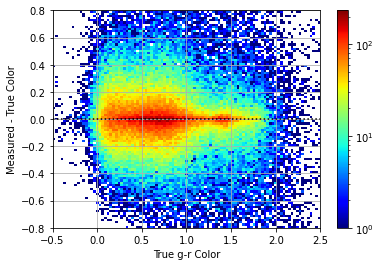

In [13]:
plt.hist2d(true_gr_color, diff_gr_color, bins = (np.linspace(-0.5,2.5,100, endpoint=True), np.linspace(-0.8,0.8,100, endpoint=True)), cmap=plt.cm.jet, norm=LogNorm())
plt.axhline(y=0, color='k', linestyle=':')
plt.colorbar()
plt.xlabel('True g-r Color')
plt.ylabel('Measured - True Color')
plt.grid()
plt.show()

The code below is no longer relevant. It's purpose was to find the cause of the low accuracy hot spot above the origin. The cause of this was that the dereddened magnitudes would often have magnitudes close to but not quite 37.5 due to the dereddening.

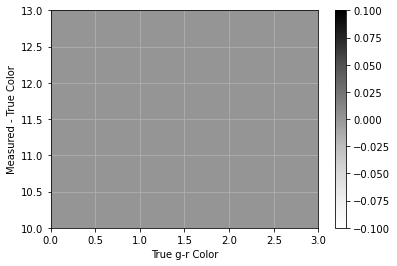

In [12]:
plt.hist2d(true_gr_color, diff_gr_color, bins = (np.linspace(0,3,100, endpoint=True), np.linspace(10,13,100, endpoint=True)), cmap=plt.cm.Greys)
plt.axhline(y=0, color='k', linestyle=':')
plt.colorbar()
plt.xlabel('True g-r Color')
plt.ylabel('Measured - True Color')
plt.grid()
plt.show()

In [21]:
high_clump_restriction = np.where((diff_gr_color >= 10) & (diff_gr_color <= 13) & (true_gr_color >= 0) & (true_gr_color <= 3))

In [22]:
high_true_g_mag = true_g_mag[high_clump_restriction]
high_meas_g_mag = meas_g_mag[high_clump_restriction]

high_true_r_mag = true_r_mag[high_clump_restriction]
high_meas_r_mag = meas_r_mag[high_clump_restriction]

In [23]:
print(len(high_true_g_mag))

0


TypeError: expected non-empty vector for x

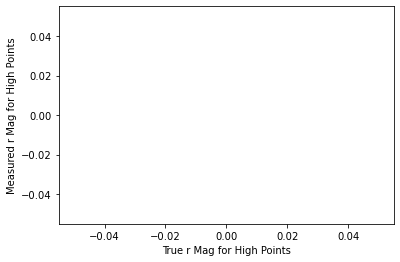

In [24]:
plt.scatter(high_true_r_mag, high_meas_r_mag, s=5)
plt.xlabel("True r Mag for High Points")
plt.ylabel("Measured r Mag for High Points")

plotLinearFit(high_true_r_mag, high_meas_r_mag)

x_values = np.linspace(np.min(high_true_r_mag), np.max(high_true_r_mag),1000)
plt.plot(x_values, x_values, color = 'k', label = 'Ideal: y=x')

plt.legend()
plt.xlim([22.5, 26])
plt.ylim([22.5, 26])
plt.show()

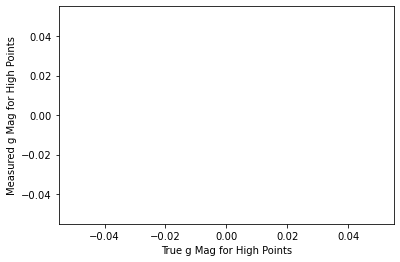

In [25]:
plt.scatter(high_true_g_mag, high_meas_g_mag, s=5)
plt.xlabel("True g Mag for High Points")
plt.ylabel("Measured g Mag for High Points")
plt.show()

In [26]:
print(np.max(high_meas_g_mag))

ValueError: zero-size array to reduction operation maximum which has no identity

In [27]:
print(np.max(meas_g_mag))

35.630254447020995
